In [79]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [80]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams.update({'figure.max_open_warning': 0,
                 'font.size': 14,
                 'axes.titlesize': 14,
                 'axes.labelsize': 14,
                 'xtick.direction': 'in',
                 'ytick.direction': 'in',
                 'xtick.labelsize': 12,
                 'ytick.labelsize': 12})

#rcParams.keys() 

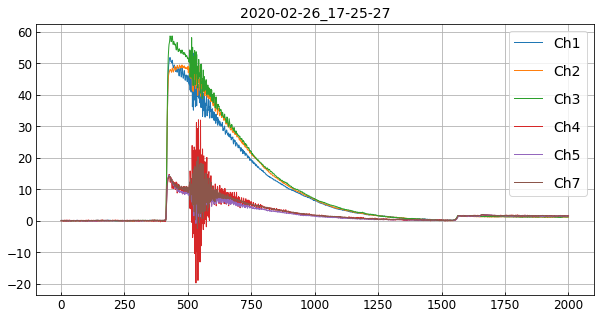

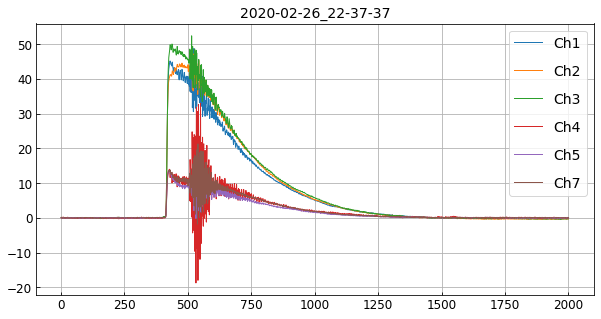

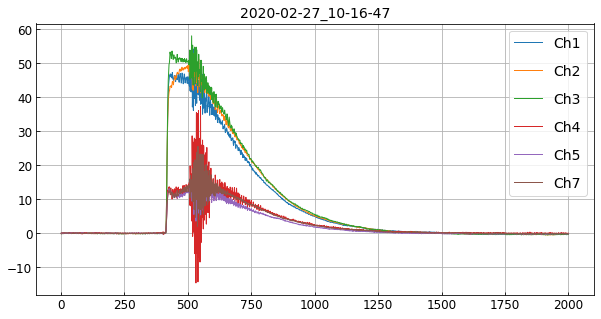

In [134]:
dirname = '/home/furkan/data/test_pods/'
Run = []

for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            #print(str(os.path.splitext(filename)[0]))
            #Run: Run.append('Run_' + '[' + filename.split('.pkl')[0] + ']')
            #print(Run)
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            #pkl_file = open(dirname + str(os.path.splitext(filename)[0]) + '.pkl', 'rb')
            #mydata = pickle.load(pkl_file)

            dict_s ={}
            for key, value in mydata.items():
                #print(mydata[key].max(axis=0))
                channel=mydata[key]
                dict_s.update({key:channel})

            for key, value in dict_s.items():
                plt.plot(range(1, len(value) + 1), value, label=key, linewidth=1)
                # NOTE: changed `range(1, 4)` to mach actual values count
            plt.title(str(os.path.splitext(filename)[0]))
            plt.grid(True)
            #plt.yscale('log')
            #plt.xlim(200, 600)
            #plt.ylim(0.0001, 0.1)
            plt.legend(labelspacing=1, fontsize='medium')  # To draw legend
            plt.show()                 

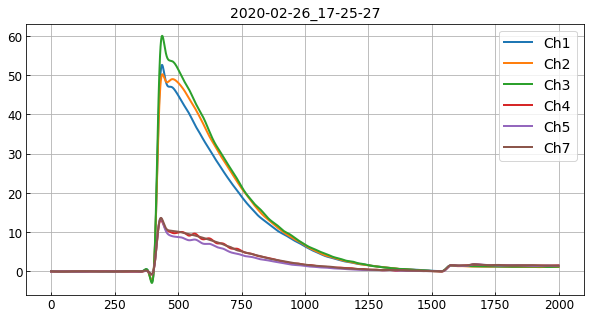

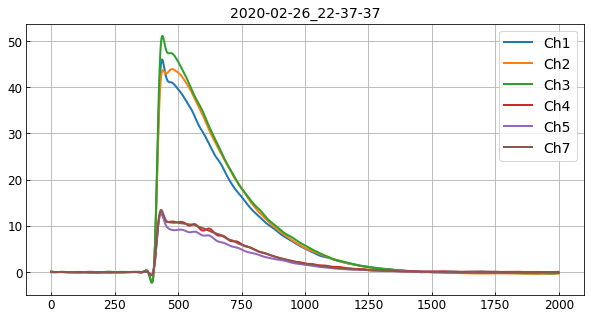

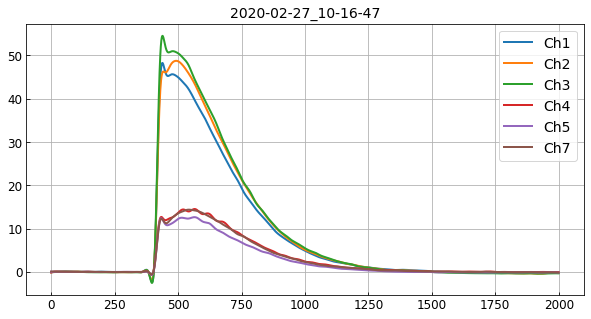

In [146]:
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # lowpass filter
                b, a = signal.butter(3, 0.05)
                #zi = signal.lfilter_zi(b, a)
                #z, _ = signal.lfilter(b, a, value, zi=zi*value[0])
                z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
                channel = signal.filtfilt(b, a, value)   

                dict_s.update({key:channel})

            for key, value in dict_s.items():
                xtime=range(1, len(value) + 1),
                plt.plot(value, label=key, linewidth=2)
            plt.title(str(os.path.splitext(filename)[0]))
            plt.grid(True)
            plt.legend() 
            plt.show()    

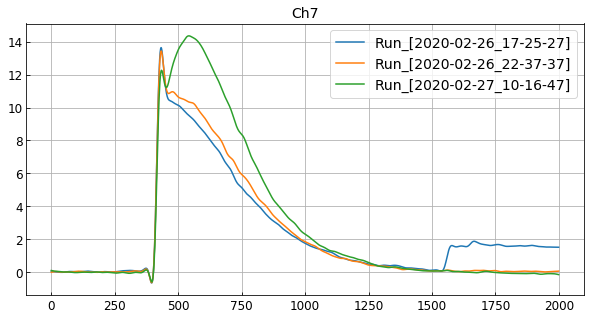

In [150]:
channels = ['Ch7']
#channels = ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7']

for ch in channels:
    for filename in sorted(os.listdir(dirname)):
        if '.pkl' in filename:
            Run: Run.append('Run_' + '[' + filename.split('.pkl')[0] + ']')
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            b, a = signal.butter(3, 0.05)
            zi = signal.lfilter_zi(b, a)
            z, _ = signal.lfilter(b, a, mydata[ch], zi=zi*mydata[ch][0])
            z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
            y = signal.filtfilt(b, a, mydata[ch])
            t=range(1, len(y) + 1)

        plt.grid(True)
        plt.title(ch)
        plt.plot(y)
    #plt.legend(str(os.path.splitext(filename)[0]))
    plt.legend(Run) 

    plt.show()


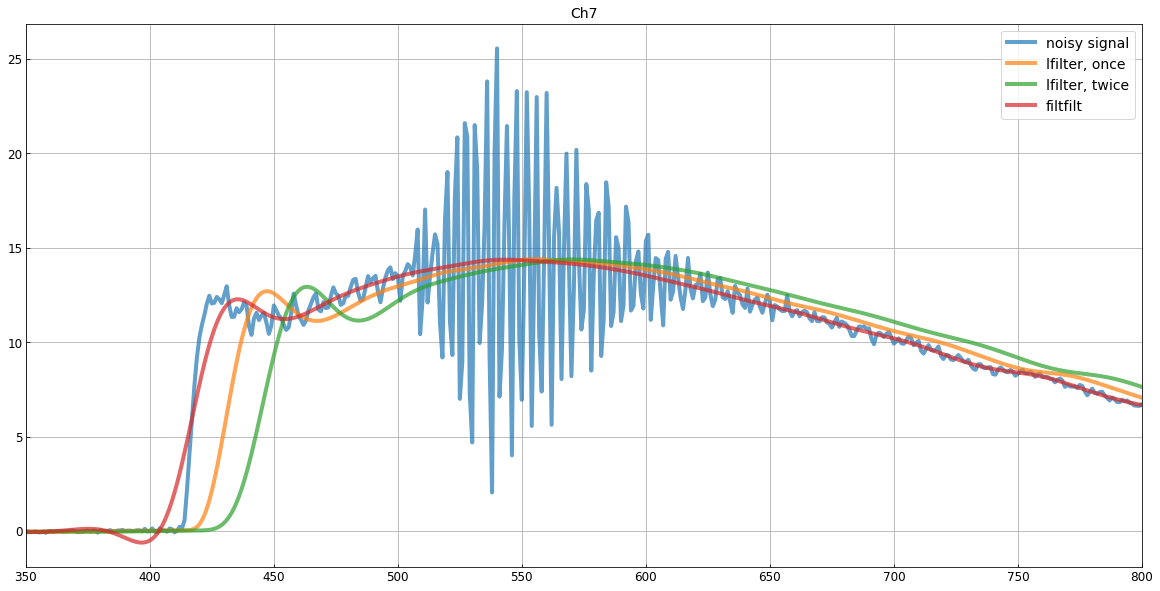

In [175]:
channels = ['Ch7']
#channels = ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7']

for ch in channels:
    for filename in sorted(os.listdir(dirname)):
        if '10-16-47' in filename:
            continue
            Run: Run.append('Run_' + '[' + filename.split('.pkl')[0] + ']')
                
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            b, a = signal.butter(3, 0.05)
            zi = signal.lfilter_zi(b, a)
            z, _ = signal.lfilter(b, a, mydata[ch], zi=zi*mydata[ch][0])
            z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
            y = signal.filtfilt(b, a, mydata[ch])
            t=range(1, len(y) + 1)
    plt.grid(True)
    plt.title(ch)    
    plt.plot(t, mydata[ch],t,z,t,z2,t,y, linewidth=4,alpha=0.7)
    #plt.legend(str(os.path.splitext(filename)[0]))
    plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice','filtfilt'), loc='best')
    plt.xlim(350, 800)

    plt.show()